1. COLLECTING DATA SET AND SAVE THEM IN CSV FILE


In [ ]:
import cv2
import numpy as np
import pandas as pd
from datetime import datetime
import time
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import os

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)

# Function to extract hand landmarks using MediaPipe
def extract_hand_landmarks(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)
    
    landmarks = []
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            for lm in hand_landmarks.landmark:
                landmarks.extend([lm.x, lm.y, lm.z])
    
    return np.array(landmarks)

# Function to draw a rectangular box around the hand with green color
def draw_hand_box(frame, results):
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            x_min = 1.0
            y_min = 1.0
            x_max = 0.0
            y_max = 0.0
            for lm in hand_landmarks.landmark:
                x, y = lm.x, lm.y
                if x < x_min:
                    x_min = x
                if x > x_max:
                    x_max = x
                if y < y_min:
                    y_min = y
                if y > y_max:
                    y_max = y
            # Convert normalized coordinates to pixel coordinates
            height, width, _ = frame.shape
            x_min = int(x_min * width)
            x_max = int(x_max * width)
            y_min = int(y_min * height)
            y_max = int(y_max * height)
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Green color for the box

# Function to create a simple model (placeholder for Fast R-CNN concept)
def create_fast_rcnn_model(input_shape, num_classes):
    input_image = Input(shape=input_shape, name='input_image')
    
    # Convolutional layers
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_image)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    
    # Global average pooling layer
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    # Fully connected layers
    x = Dense(1024, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input_image, outputs=output)
    return model

# Function to save data
def save_data(dataset, action):
    df = pd.DataFrame(dataset)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Create dataset folder if it doesn't exist
    dataset_folder = "dataset11"
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)
    
    filename = os.path.join(dataset_folder, f"{action}_{timestamp}.csv")
    df.to_csv(filename, index=False)
    print(f"Data for '{action}' saved to {filename}")

# Data collection function
def collect_data():
    cap = cv2.VideoCapture(0)
    
    actions = [ "one","two","three","four","five"]  # Add more actions as needed
    samples_per_action = 50
    
    for action in actions:
        print(f"Prepare to collect data for '{action}'")
        time.sleep(2)  # Wait for 2 seconds before starting data collection
        
        dataset = []
        samples_collected = 0
        while samples_collected < samples_per_action:
            ret, frame = cap.read()
            if not ret:
                print("Error reading from webcam.")
                break
            
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = hands.process(rgb_frame)
            
            landmarks = extract_hand_landmarks(frame)
            draw_hand_box(frame, results)  # Draw a rectangular box around the hand with green color
            
            cv2.putText(frame, f"Collecting: {action} ({samples_collected+1}/{samples_per_action})", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.imshow("Data Collection", frame)
            
            if len(landmarks) > 0:
                dataset.append(landmarks)
                samples_collected += 1
                print(f"Captured gesture: {action} ({samples_collected}/{samples_per_action})")
            else:
                print(f"No hand detected for {action}. Please show your hand clearly.")
            
            key = cv2.waitKey(1)
            if key == ord('q'):
                break
            
            time.sleep(0.1)  # Short delay between captures
        
        print(f"Completed data collection for '{action}'")
        save_data(dataset, action)
        time.sleep(1)  # Short break between actions
    
    cap.release()
    cv2.destroyAllWindows()

print("Collecting data...")
collect_data()
print("Data collection and saving completed.")


Prepare to collect data for 'one'
No hand detected for one. Please show your hand clearly.
Completed data collection for 'one'
Data for 'one' saved to dataset11\one_20241108_140939.csv
Prepare to collect data for 'two'
No hand detected for two. Please show your hand clearly.
Completed data collection for 'two'
Data for 'two' saved to dataset11\two_20241108_140942.csv
Prepare to collect data for 'three'
No hand detected for three. Please show your hand clearly.
Completed data collection for 'three'
Data for 'three' saved to dataset11\three_20241108_140945.csv
Prepare to collect data for 'four'
No hand detected for four. Please show your hand clearly.
Completed data collection for 'four'
Data for 'four' saved to dataset11\four_20241108_140948.csv
Prepare to collect data for 'five'
No hand detected for five. Please show your hand clearly.
Completed data collection for 'five'
Data for 'five' saved to dataset11\five_20241108_140951.csv
Data collection and saving completed.


2. RENAMING THE DATASET AND SAVE THEM IN NEW FOLDER


In [3]:
# Create a new data folder and save renamed files
import os
import re
import shutil

dataset1_path = 'dataset11'  # Adjust this path if necessary
new_data_folder = 'cleaned_dataset5'  # Name of the new data folder

# Create the new data folder if it doesn't exist
if not os.path.exists(new_data_folder):
    os.makedirs(new_data_folder)

csv_files = [f for f in os.listdir(dataset1_path) if f.endswith('.csv')]

def clean_filename(filename):
    # Remove the file extension
    name = os.path.splitext(filename)[0]
    # Remove any timestamp pattern (assuming it's always in the format _YYYYMMDD_HHMMSS)
    cleaned_name = re.sub(r'_\d{8}_\d{6}', '', name)
    return cleaned_name

if csv_files:
    processed_files = set()
    for file in csv_files:
        old_path = os.path.join(dataset1_path, file)
        new_filename = clean_filename(file) + '.csv'
        
        if new_filename not in processed_files:
            new_path = os.path.join(new_data_folder, new_filename)
            
            # Copy and rename the file to the new folder
            shutil.copy2(old_path, new_path)
            print(f"Copied and renamed: {file} -> {new_filename}")
            processed_files.add(new_filename)
        else:
            print(f"Skipped duplicate: {file}")
    
    print(f"\nAll unique files have been copied and renamed in the '{new_data_folder}' folder.")
else:
    print("No CSV files found in dataset1.")


Copied and renamed: five_20241108_141604.csv -> five.csv
Copied and renamed: four_20241108_141547.csv -> four.csv
Copied and renamed: hello_20241108_141851.csv -> hello.csv
Copied and renamed: i love you_20241108_141951.csv -> i love you.csv
Copied and renamed: one_20241108_141455.csv -> one.csv
Copied and renamed: salute_20241108_141933.csv -> salute.csv
Copied and renamed: smile_20241108_141913.csv -> smile.csv
Copied and renamed: thank you_20241108_142008.csv -> thank you.csv
Copied and renamed: three_20241108_141530.csv -> three.csv
Copied and renamed: two_20241108_141512.csv -> two.csv

All unique files have been copied and renamed in the 'cleaned_dataset5' folder.


3. TRAINING THE MODEL


Datasets being used for training:
- five
- four
- hello
- iloveyou
- one
- smile
- thankyou
- three
- two
Label encoder saved as label_encoder.pkl
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1532 - loss: 2.1655 - val_accuracy: 0.3000 - val_loss: 2.0961
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3631 - loss: 2.0762 - val_accuracy: 0.4111 - val_loss: 2.0033
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4771 - loss: 1.9219 - val_accuracy: 0.4111 - val_loss: 1.8040
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5148 - loss: 1.7370 - val_accuracy: 0.4222 - val_loss: 1.5479
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6335 - loss: 1.4784 - val_accuracy: 0.6444 - val_loss: 1.2762
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8159 - loss: 1.1945 - val_accuracy: 0.8333 - val_loss: 1.0028
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9129 - loss: 0.9335 - val_accura

Test accuracy: 1.00
Model saved as sign_language_testing5_multi.h5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


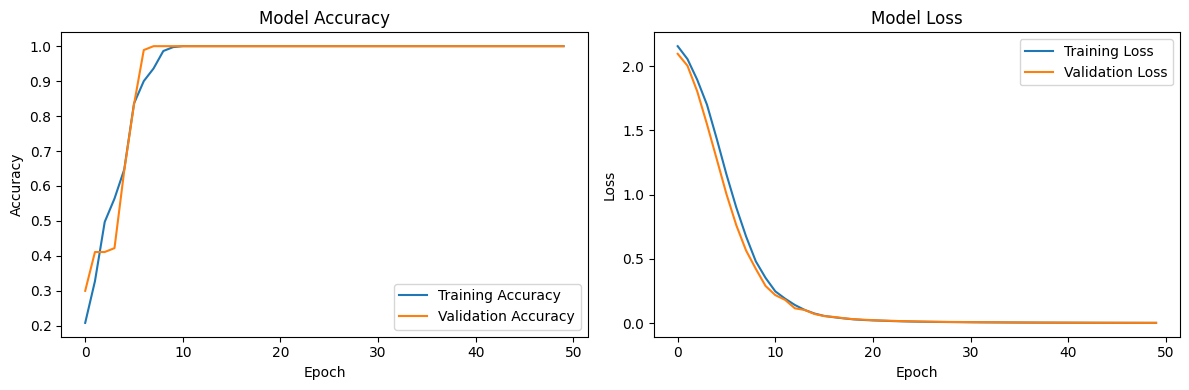

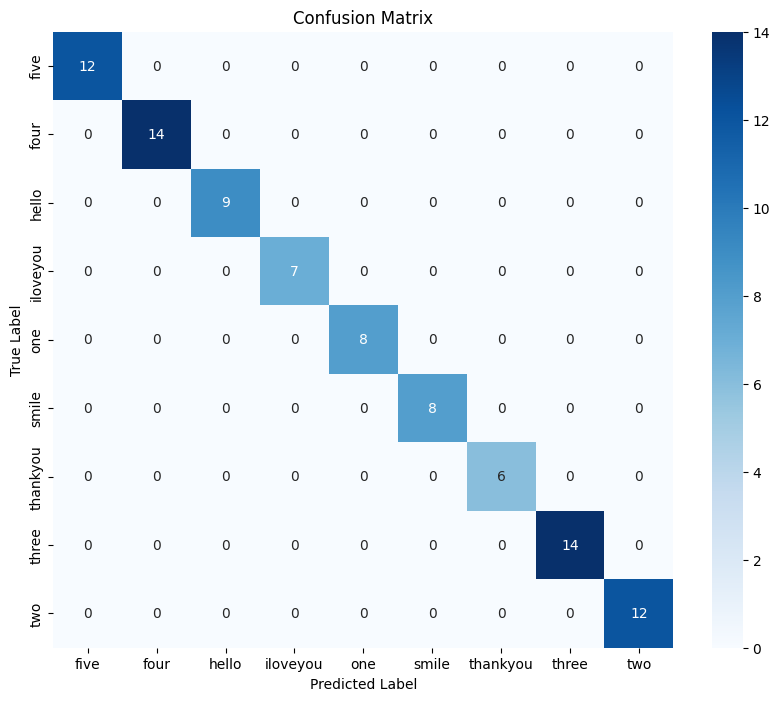

Model training completed.


In [5]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mediapipe as mp
import cv2
import glob
import pickle

# Function to load and preprocess multiple datasets
def load_multiple_datasets(dataset_paths):
    all_data = []
    all_labels = []
    for dataset_path in dataset_paths:
        data = pd.read_csv(dataset_path)
        X = data.iloc[:, :-1].values  # All columns except the last one
        label = os.path.splitext(os.path.basename(dataset_path))[0]  # Use filename without extension as label
        y = np.full(X.shape[0], label)
        all_data.append(X)
        all_labels.extend(y)
    return np.vstack(all_data), np.array(all_labels)

# Function to create the model (simplified version without RoI Pooling)
def create_model(input_shape, num_classes):
    input_features = Input(shape=input_shape, name='input_features')
    
    x = Dense(256, activation='relu')(input_features)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    
    output = Dense(num_classes, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_features, outputs=output)
    return model

# Function to train the model
def train_model(X, y, model_name):
    # Encode the labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Save the label encoder
    with open('label_encoder5.pkl', 'wb') as f:
        pickle.dump(label_encoder, f)
    print("Label encoder saved as label_encoder.pkl")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    
    # Create the model
    input_shape = X_train.shape[1:]  # Shape of a single sample
    num_classes = len(label_encoder.classes_)
    model = create_model(input_shape, num_classes)
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=32)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {test_accuracy:.2f}")
    
    # Save the model
    model.save(model_name)
    print(f"Model saved as {model_name}")
    
    # Generate confusion matrix
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred_classes)
    
    return model, label_encoder, history, cm

# Set the dataset directory
dataset_dir = "cleaned_dataset/"

# Get all CSV files in the dataset directory
dataset_paths = glob.glob(os.path.join(dataset_dir, "*.csv"))

# Print the datasets being used
print("Datasets being used for training:")
for path in dataset_paths:
    print(f"- {os.path.splitext(os.path.basename(path))[0]}")

# Set the model name
model_name = "sign_language_testing5_multi.h5"

# Load and preprocess the data from multiple datasets
X, y = load_multiple_datasets(dataset_paths)

# Train the model
trained_model, label_encoder, training_history, confusion_mat = train_model(X, y, model_name)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix with action names
plt.figure(figsize=(10, 8))
action_names = label_encoder.classes_
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=action_names, yticklabels=action_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Model training completed.")


4. LIVE DETECTION


In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import mediapipe as mp
import pickle

# Load the trained model
def load_model(model_path):
    if os.path.exists(model_path):
        print(f"Loading existing model from {model_path}...")
        try:
            model = tf.keras.models.load_model(model_path)
            return model
        except Exception as e:
            print(f"Error loading model: {str(e)}")
            return None
    else:
        print(f"Model not found at {model_path}. Please train the model first.")
        return None

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Function for hand landmark detection
def detect_hand_landmarks(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)
    if results.multi_hand_landmarks:
        return frame, results.multi_hand_landmarks
    return frame, None

# Function to extract features from hand landmarks
def extract_features(landmarks):
    features = []
    for landmark in landmarks.landmark:
        features.extend([landmark.x, landmark.y, landmark.z])
    return np.array(features)

# Function to get bounding box coordinates
def get_bounding_box(hand_landmarks, frame_shape):
    x_coords = [landmark.x for landmark in hand_landmarks.landmark]
    y_coords = [landmark.y for landmark in hand_landmarks.landmark]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    
    frame_height, frame_width = frame_shape[:2]
    x_min = max(0, int(x_min * frame_width))
    x_max = min(frame_width, int(x_max * frame_width))
    y_min = max(0, int(y_min * frame_height))
    y_max = min(frame_height, int(y_max * frame_height))
    
    return x_min, y_min, x_max, y_max

# Live detection function
def live_detection(model_paths):
    models = [load_model(path) for path in model_paths]
    if any(model is None for model in models):
        print("Failed to load one or more models. Exiting.")
        return

    cap = cv2.VideoCapture(0)
    
    # Load the label encoder
    with open('label_encoder4.pkl', 'rb') as f:
        label_encoder = pickle.load(f)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Detect hand landmarks
        frame, landmarks = detect_hand_landmarks(frame)
        
        if landmarks:
            for i, hand_landmarks in enumerate(landmarks):
                # Get bounding box coordinates
                x_min, y_min, x_max, y_max = get_bounding_box(hand_landmarks, frame.shape)
                
                # Extract features
                features = extract_features(hand_landmarks)
                
                # Reshape features for model input
                features = features.reshape(1, -1)  # Flatten the features
                
                # Ensure the input shape matches the model's expected input
                expected_shape = models[0].input_shape[1]
                if features.shape[1] != expected_shape:
                    features = features[:, :expected_shape]
                
                # Predict using all models
                predictions = []
                for model in models:
                    prediction = model.predict(features)
                    predicted_class = np.argmax(prediction)
                    predictions.append(predicted_class)
                
                # Display predictions and perform actions
                for j, predicted_class in enumerate(predictions):
                    try:
                        class_name = label_encoder.inverse_transform([predicted_class])[0]
                    except ValueError:
                        class_name = "Unknown"
                    
                    # Draw bounding box
                    cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    
                    # Display class name above the bounding box
                    cv2.putText(frame, f"{class_name}", (x_min, y_min - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                    
                    # Perform action based on prediction
                    if class_name == "Hello":
                        cv2.putText(frame, "Action: Waving", (10, frame.shape[0] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                    elif class_name == "Thank You":
                        cv2.putText(frame, "Action: Bowing", (10, frame.shape[0] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                    # Add more actions for other predicted classes as needed
        
        cv2.imshow("Sign Language Detection", frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Run live detection with multiple model paths
model_paths = ["sign_language_testing4_multi.h5"]
live_detection(model_paths)

Loading existing model from sign_language_testing4_multi.h5...


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


audio output


In [2]:
import tensorflow as tf
import os
import cv2
import numpy as np
import mediapipe as mp
import pickle
import pyttsx3  # Importing the text-to-speech library
import threading  # For threading support

# Load the trained model
def load_model(model_path):
    if os.path.exists(model_path):
        print(f"Loading existing model from {model_path}...")
        try:
            model = tf.keras.models.load_model(model_path)
            return model
        except Exception as e:
            print(f"Error loading model: {str(e)}")
            return None
    else:
        print(f"Model not found at {model_path}. Please train the model first.")
        return None

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Initialize text-to-speech engine
engine = pyttsx3.init()

# Function for non-blocking speech output
def speak(action_text):
    engine.say(f"You are showing {action_text}.")
    engine.runAndWait()

# Function for hand landmark detection
def detect_hand_landmarks(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)
    if results.multi_hand_landmarks:
        return frame, results.multi_hand_landmarks
    return frame, None

# Function to extract features from hand landmarks
def extract_features(landmarks):
    features = []
    for landmark in landmarks:
        features.extend([landmark.x, landmark.y, landmark.z])
    return np.array(features)

# Function to get bounding box coordinates
def get_bounding_box(hand_landmarks, frame_shape):
    x_coords = [landmark.x for landmark in hand_landmarks.landmark]
    y_coords = [landmark.y for landmark in hand_landmarks.landmark]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    
    frame_height, frame_width = frame_shape[:2]
    x_min = max(0, int(x_min * frame_width))
    x_max = min(frame_width, int(x_max * frame_width))
    y_min = max(0, int(y_min * frame_height))
    y_max = min(frame_height, int(y_max * frame_height))
    
    return x_min, y_min, x_max, y_max

# Live detection function
def live_detection(model_paths):
    models = [load_model(path) for path in model_paths]
    if any(model is None for model in models):
        print("Failed to load one or more models. Exiting.")
        return

    cap = cv2.VideoCapture(0)
    
    # Load the label encoder
    with open('label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Detect hand landmarks
        frame, landmarks = detect_hand_landmarks(frame)
        
        if landmarks:
            for i, hand_landmarks in enumerate(landmarks):
                # Get bounding box coordinates
                x_min, y_min, x_max, y_max = get_bounding_box(hand_landmarks, frame.shape)
                
                # Extract features
                features = extract_features(hand_landmarks.landmark)
                
                # Reshape features for model input
                features = features.reshape(1, -1)  # Flatten the features
                
                # Ensure the input shape matches the model's expected input
                expected_shape = models[0].input_shape[1]
                if features.shape[1] != expected_shape:
                    features = features[:, :expected_shape]
                
                # Predict using all models
                predictions = []
                for model in models:
                    prediction = model.predict(features)
                    predicted_class = np.argmax(prediction)
                    predictions.append(predicted_class)
                
                # Display predictions and perform actions
                for j, predicted_class in enumerate(predictions):
                    try:
                        class_name = label_encoder.inverse_transform([predicted_class])[0]
                    except ValueError:
                        class_name = "Unknown"
                    
                    # Draw bounding box
                    cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                    
                    # Display class name above the bounding box
                    cv2.putText(frame, f"{class_name}", (x_min, y_min - 10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                    
                    # Perform action based on prediction and provide voice feedback
                    action_text = class_name  # Use the class name as the action text
                    cv2.putText(frame, f"Action: {action_text}", (10, frame.shape[0] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                    
                    # Start a new thread for speech output
                    threading.Thread(target=speak, args=(action_text,)).start()
        
        cv2.imshow("Sign Language Detection", frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Run live detection with multiple model paths
model_paths = ["sign_language_testing2_multi.h5"]
live_detection(model_paths)

Loading existing model from sign_language_testing2_multi.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-115 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-116 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-117 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Exception in thread Thread-118 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Exception in thread Thread-119 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Exception in thread Thread-120 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Exception in thread Thread-121 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Exception in thread Thread-123 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Exception in thread Thread-124 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-125 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Exception in thread Thread-126 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Exception in thread Thread-127 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Exception in thread Thread-128 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Exception in thread Thread-129 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Exception in thread Thread-130 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Exception in thread Thread-132 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-133 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Exception in thread Thread-134 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Exception in thread Thread-135 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-136 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Exception in thread Thread-137 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Exception in thread Thread-138 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-139 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Exception in thread Thread-140 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Exception in thread Thread-141 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Exception in thread Thread-143 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Exception in thread Thread-144 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Exception in thread Thread-145 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Exception in thread Thread-146 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-147 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Exception in thread Thread-148 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Exception in thread Thread-149 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-150 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Exception in thread Thread-151 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Exception in thread Thread-153 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-154 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Exception in thread Thread-155 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Exception in thread Thread-156 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Exception in thread Thread-157 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Exception in thread Thread-158 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Exception in thread Thread-159 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-160 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Exception in thread Thread-161 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Exception in thread Thread-162 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Exception in thread Thread-164 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-165 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Exception in thread Thread-166 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Exception in thread Thread-167 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Exception in thread Thread-168 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Exception in thread Thread-169 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-170 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Exception in thread Thread-171 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Exception in thread Thread-172 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Exception in thread Thread-173 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Exception in thread Thread-175 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Exception in thread Thread-176 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Exception in thread Thread-177 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-178 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Exception in thread Thread-179 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-180 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-181 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-183 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Exception in thread Thread-184 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-185 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-186 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Exception in thread Thread-187 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Exception in thread Thread-188 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Exception in thread Thread-189 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Exception in thread Thread-190 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Exception in thread Thread-191 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Exception in thread Thread-192 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Exception in thread Thread-193 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Exception in thread Thread-195 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Exception in thread Thread-196 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Exception in thread Thread-197 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Exception in thread Thread-198 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Exception in thread Thread-199 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Exception in thread Thread-200 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-201 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-202 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Exception in thread Thread-203 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Exception in thread Thread-204 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Exception in thread Thread-206 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Exception in thread Thread-207 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Exception in thread Thread-208 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-209 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Exception in thread Thread-210 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Exception in thread Thread-211 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Exception in thread Thread-212 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Exception in thread Thread-213 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Exception in thread Thread-214 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-216 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Exception in thread Thread-217 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Exception in thread Thread-218 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
Exception in thread Thread-219 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-package

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Exception in thread Thread-220 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Exception in thread Thread-221 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Exception in thread Thread-222 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClas

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Exception in thread Thread-223 (speak):
Traceback (most recent call last):
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Users\VISHAL\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\VISHAL\AppData\Local\Temp\ipykernel_2028\1426131092.py", line 35, in speak
  File "c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\pyttsx3\engine.py", line 180, in runAndWait
    raise RuntimeError('run loop already started')
RuntimeError: run loop already started


audio 2 with test to speech conveter

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import mediapipe as mp
import pickle
import pyttsx3  # Importing the text-to-speech library
import threading  # For threading support
import time  # To add delay between repeated actions

# Load the trained model
def load_model(model_path):
    if os.path.exists(model_path):
        print(f"Loading existing model from {model_path}...")
        try:
            model = tf.keras.models.load_model(model_path)
            return model
        except Exception as e:
            print(f"Error loading model: {str(e)}")
            return None
    else:
        print(f"Model not found at {model_path}. Please train the model first.")
        return None

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Initialize text-to-speech engine
engine = pyttsx3.init()

# Function for non-blocking speech output
def speak(action_text):
    engine.say(f"You are showing {action_text}.")
    engine.runAndWait()

# Function for hand landmark detection
def detect_hand_landmarks(frame):
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)
    if results.multi_hand_landmarks:
        return frame, results.multi_hand_landmarks
    return frame, None

# Function to extract features from hand landmarks
def extract_features(landmarks):
    features = []
    for landmark in landmarks:
        features.extend([landmark.x, landmark.y, landmark.z])
    return np.array(features)

# Function to get bounding box coordinates
def get_bounding_box(hand_landmarks, frame_shape):
    x_coords = [landmark.x for landmark in hand_landmarks.landmark]
    y_coords = [landmark.y for landmark in hand_landmarks.landmark]  # Corrected line
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    
    frame_height, frame_width = frame_shape[:2]
    x_min = max(0, int(x_min * frame_width))
    x_max = min(frame_width, int(x_max * frame_width))
    y_min = max(0, int(y_min * frame_height))
    y_max = min(frame_height, int(y_max * frame_height))
    
    return x_min, y_min, x_max, y_max

# Live detection function
def live_detection(model_paths):
    models = [load_model(path) for path in model_paths]
    if any(model is None for model in models):
        print("Failed to load one or more models. Exiting.")
        return

    cap = cv2.VideoCapture(0)
    
    # Load the label encoder
    with open('label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)

    # Track the last action and time of detection
    last_action = None
    last_spoken_action = None
    last_detection_time = 0
    cooldown_period = 2  # 2 seconds cooldown between action recognition
    hand_present = False
    action_text = "No action detected"  # Initialize the default text
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Detect hand landmarks
        frame, landmarks = detect_hand_landmarks(frame)
        
        if landmarks:
            hand_present = True  # Hand detected
            
            for i, hand_landmarks in enumerate(landmarks):
                # Get bounding box coordinates
                x_min, y_min, x_max, y_max = get_bounding_box(hand_landmarks, frame.shape)
                
                # Extract features
                features = extract_features(hand_landmarks.landmark)
                
                # Reshape features for model input
                features = features.reshape(1, -1)  # Flatten the features
                
                # Ensure the input shape matches the model's expected input
                expected_shape = models[0].input_shape[1]
                if features.shape[1] != expected_shape:
                    features = features[:, :expected_shape]
                
                # Predict using all models
                predictions = []
                for model in models:
                    prediction = model.predict(features)
                    predicted_class = np.argmax(prediction)
                    predictions.append(predicted_class)
                
                # Use majority voting from all models
                most_likely_class = max(set(predictions), key=predictions.count)
                
                try:
                    class_name = label_encoder.inverse_transform([most_likely_class])[0]
                except ValueError:
                    class_name = "Unknown"
                
                # Ensure a cooldown period between predictions for audio
                current_time = time.time()
                if class_name != last_action:
                    last_action = class_name  # Update the last detected action
                    action_text = class_name  # Update the action text
                
                # Draw bounding box
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                
                # Display class name above the bounding box
                cv2.putText(frame, f"{class_name}", (x_min, y_min - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
                
                # Display action text on screen (continuously)
                cv2.putText(frame, f"Action: {action_text}", (10, frame.shape[0] - 30), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
                
                # Only give audio output if the action changes
                if class_name != last_spoken_action and (current_time - last_detection_time) > cooldown_period:
                    last_spoken_action = class_name
                    last_detection_time = current_time
                    threading.Thread(target=speak, args=(class_name,)).start()
        
        else:
            action_text = "No hand detected"  # Display "No hand detected" when no landmarks are found
        
        cv2.imshow("Sign Language Detection", frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

# Run live detection with multiple model paths
model_paths = ["sign_language_testing2_multi.h5"]
live_detection(model_paths)


Loading existing model from sign_language_testing2_multi.h5...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\VISHAL\Desktop\project mark 3\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
